<a href="https://colab.research.google.com/github/JoaoAlexandreFerreira/RNA/blob/main/Rede_neural_su_et_al_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
# Carregando o dataset
import numpy as np
import keras
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.initializers import Ones, Zeros, RandomUniform, RandomNormal, glorot_uniform
from keras.metrics import MeanAbsolutePercentageError, MeanAbsoluteError, MeanRelativeError

df = pd.read_csv('data_cov (1).csv')

#Separando em entrada e saída
y = df['cov']
x = df.drop('cov', axis = 1)
flow = df['flow_distance_ratio']

Será realizada uma comparação com os dados em ordem crescente e com os dados sorteados aleatoriamente, respectivamente.

In [151]:
#Separando dados para treino e para teste da rede neural, primeiramente de modo ordenado

x_treino = x[0:85:] ; x_teste = x[85:]
y_treino = y[0:85] ; y_teste = y[85:]
print(x_treino)
#Normalizando os dados de entrada
scaler = MinMaxScaler()
x_treino_normalizado = scaler.fit_transform(x_treino)
x_teste_normalizado = scaler.transform(x_teste)

    hbr  velocity  temperatura  diamenter_ratio  flow_distance_ratio
0   0.1         1          300              0.2                    2
1   0.1         1          300              0.2                    3
2   0.1         1          300              0.2                    4
3   0.1         1          300              0.2                    5
4   0.1         1          300              0.2                    6
..  ...       ...          ...              ...                  ...
80  0.1         1          300              0.2                   84
81  0.1         1          300              0.2                   85
82  0.1         1          300              0.2                   86
83  0.1         1          300              0.2                   87
84  0.1         1          300              0.2                   88

[85 rows x 5 columns]


In [152]:
#Para criar o modelo da rede precisamos usar o Sequential, do keras.models

modelo = Sequential()
modelo.add(tf.keras.layers.Input(shape=(x_treino_normalizado.shape[1],)))
#No paper de su é informado que ele inicia pelo número de camadas ocultas, com 10 neuronios/nos
#Começando uma análise com duas camadas ocultas

for i in range(11):
  modelo.add(Dense(units=40, activation='relu'))

#camaada de saída

modelo.add(Dense(units=1,activation = 'linear'))
modelo.compile(loss='mse', optimizer = 'adam', metrics=['mae'])

resultado = modelo.fit(x_treino, y_treino, epochs = 350, batch_size = 10, validation_data=(x_teste, y_teste))


Epoch 1/350
9/9 [==============================] - 3s 106ms/step - loss: 0.1178 - mae: 0.2689 - val_loss: 0.0051 - val_mae: 0.0662
Epoch 2/350
9/9 [==============================] - 0s 9ms/step - loss: 0.0220 - mae: 0.1223 - val_loss: 0.0066 - val_mae: 0.0776
Epoch 3/350
9/9 [==============================] - 0s 10ms/step - loss: 0.0103 - mae: 0.0729 - val_loss: 0.0032 - val_mae: 0.0495
Epoch 4/350
9/9 [==============================] - 0s 10ms/step - loss: 0.0052 - mae: 0.0545 - val_loss: 0.0085 - val_mae: 0.0884
Epoch 5/350
9/9 [==============================] - 0s 8ms/step - loss: 0.0043 - mae: 0.0359 - val_loss: 0.0032 - val_mae: 0.0496
Epoch 6/350
9/9 [==============================] - 0s 8ms/step - loss: 0.0049 - mae: 0.0365 - val_loss: 0.0065 - val_mae: 0.0762
Epoch 7/350
9/9 [==============================] - 0s 8ms/step - loss: 0.0053 - mae: 0.0390 - val_loss: 0.0068 - val_mae: 0.0780
Epoch 8/350
9/9 [==============================] - 0s 8ms/step - loss: 0.0061 - mae: 0.0518 -

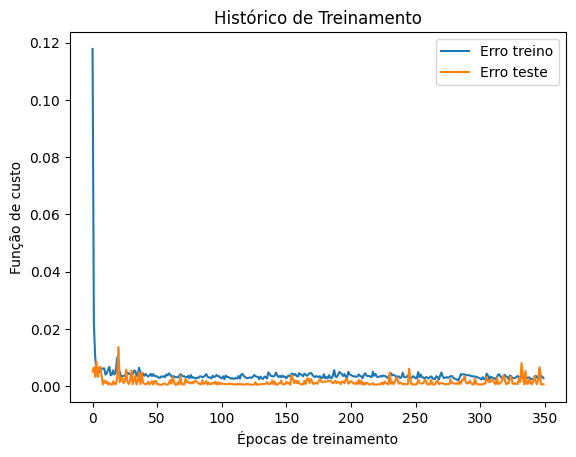

In [153]:
# Plotando gráfico do histórico de treinamento

plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.title('Histórico de Treinamento')
plt.ylabel('Função de custo')
plt.xlabel('Épocas de treinamento')
plt.legend(['Erro treino', 'Erro teste'])
plt.show()

In [154]:
y_pred = modelo.predict(x_treino)
y_pred = pd.DataFrame(y_pred)

3/3 [==============================] - 0s 4ms/step


In [155]:
#print(y_pred)

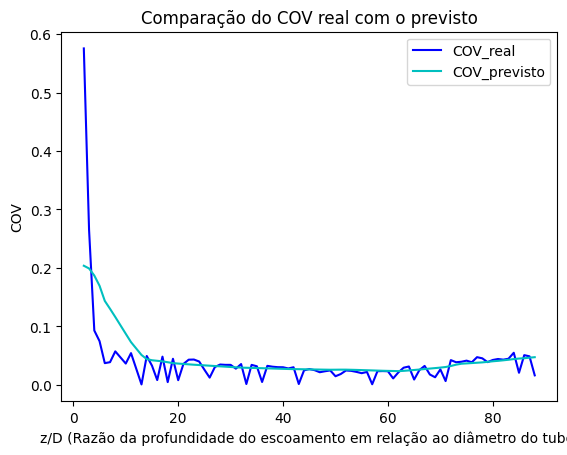

In [156]:
plt.plot(x_treino['flow_distance_ratio'], y_treino, c='b')
plt.plot(x_treino['flow_distance_ratio'], y_pred[0], c='c')
plt.title('Comparação do COV real com o previsto')
plt.ylabel('COV')
plt.xlabel('z/D (Razão da profundidade do escoamento em relação ao diâmetro do tubo)')
plt.legend(['COV_real', 'COV_previsto'])
plt.show()

Agora, a análise com dados aleatórios

In [157]:
x_treino, x_teste, y_treino, y_teste, = train_test_split(x , y, test_size = 10, random_state = None)

In [158]:
#Convertendo para array
x_treino = x_treino.values
x_teste = x_teste.values
y_treino = y_treino.values
y_teste = y_teste.values
#normalizando
scaler = MinMaxScaler()
x_treino_normalizado = scaler.fit_transform(x_treino)
x_teste_normalizado = scaler.transform(x_teste)

In [159]:
y_treino = np.reshape(y_treino, (86,1))
y_treino

array([[2.200700e-02],
       [2.341396e-02],
       [2.442745e-02],
       [3.162396e-02],
       [2.310865e-02],
       [3.864649e-02],
       [5.753539e-04],
       [2.887965e-02],
       [5.066177e-02],
       [4.453310e-02],
       [3.849311e-02],
       [2.992560e-02],
       [4.512364e-03],
       [1.168941e-01],
       [2.997259e-02],
       [2.379054e-02],
       [4.759431e-02],
       [1.859216e-02],
       [2.192068e-02],
       [1.608658e-02],
       [1.282615e-02],
       [4.405994e-02],
       [5.456175e-02],
       [2.311260e-02],
       [2.755558e-02],
       [6.423130e-02],
       [1.220860e-02],
       [2.125699e-02],
       [4.127466e-02],
       [5.711770e-02],
       [2.919449e-02],
       [6.627263e-02],
       [2.571942e-02],
       [3.034840e-02],
       [7.820450e-03],
       [5.754142e-01],
       [2.505141e-02],
       [5.411254e-02],
       [4.291913e-02],
       [3.460886e-02],
       [3.854542e-02],
       [3.402235e-02],
       [3.401993e-02],
       [2.4

In [160]:
#Criando um segundo modelo de rede neural

modelo2 = Sequential()
modelo2.add(tf.keras.layers.Input(shape=(x_treino_normalizado.shape[1],)))
#No paper de su é informado que ele inicia pelo número de camadas ocultas, com 10 neuronios/nos
#Começando uma análise com duas camadas ocultas

for i in range(11):
  modelo2.add(Dense(units=40, activation='relu'))

#camaada de saída

modelo2.add(Dense(units=1,activation = 'linear'))
modelo2.compile(loss='mse', optimizer = 'adam', metrics=['mae'])

resultado = modelo2.fit(x_treino, y_treino, epochs = 350, batch_size = 10, validation_data=(x_teste, y_teste))

Epoch 1/350
9/9 [==============================] - 2s 32ms/step - loss: 1.6024 - mae: 0.8276 - val_loss: 0.0442 - val_mae: 0.2070
Epoch 2/350
9/9 [==============================] - 0s 7ms/step - loss: 0.0117 - mae: 0.0743 - val_loss: 4.7907e-04 - val_mae: 0.0181
Epoch 3/350
9/9 [==============================] - 0s 7ms/step - loss: 0.0050 - mae: 0.0296 - val_loss: 5.4601e-04 - val_mae: 0.0208
Epoch 4/350
9/9 [==============================] - 0s 7ms/step - loss: 0.0039 - mae: 0.0235 - val_loss: 0.0021 - val_mae: 0.0354
Epoch 5/350
9/9 [==============================] - 0s 6ms/step - loss: 0.0036 - mae: 0.0271 - val_loss: 0.0012 - val_mae: 0.0309
Epoch 6/350
9/9 [==============================] - 0s 7ms/step - loss: 0.0033 - mae: 0.0275 - val_loss: 0.0013 - val_mae: 0.0301
Epoch 7/350
9/9 [==============================] - 0s 6ms/step - loss: 0.0032 - mae: 0.0250 - val_loss: 4.1438e-04 - val_mae: 0.0134
Epoch 8/350
9/9 [==============================] - 0s 7ms/step - loss: 0.0031 - mae:

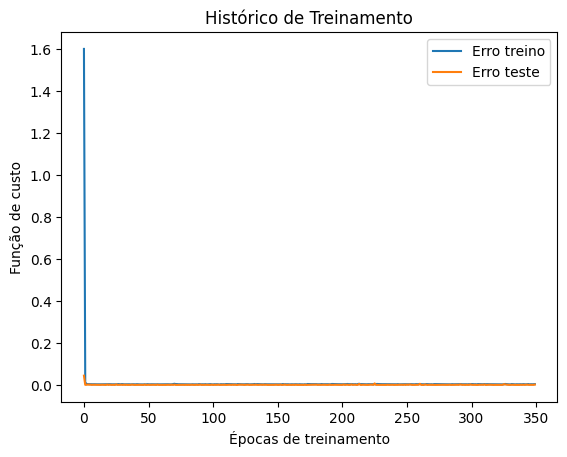

3/3 [==============================] - 0s 4ms/step


In [161]:
# Plotando gráfico do histórico de treinamento

plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.title('Histórico de Treinamento')
plt.ylabel('Função de custo')
plt.xlabel('Épocas de treinamento')
plt.legend(['Erro treino', 'Erro teste'])
plt.show()

y_pred = modelo.predict(x_treino)


In [162]:
y_pred

array([[0.02538894],
       [0.02394236],
       [0.02583901],
       [0.02856784],
       [0.02583644],
       [0.1299341 ],
       [0.05096769],
       [0.04799668],
       [0.04541082],
       [0.04278329],
       [0.03714219],
       [0.02724053],
       [0.03856155],
       [0.0467612 ],
       [0.02677908],
       [0.02561971],
       [0.04721137],
       [0.04739834],
       [0.02481031],
       [0.04716009],
       [0.02850875],
       [0.0409137 ],
       [0.04704989],
       [0.02373542],
       [0.02985169],
       [0.04796892],
       [0.03262383],
       [0.02332259],
       [0.03653875],
       [0.11592994],
       [0.02380009],
       [0.04729979],
       [0.03317829],
       [0.03206941],
       [0.03623714],
       [0.2036134 ],
       [0.02605151],
       [0.07293116],
       [0.04183318],
       [0.03151499],
       [0.03433683],
       [0.02881673],
       [0.03040611],
       [0.02569799],
       [0.03492814],
       [0.02649976],
       [0.02931452],
       [0.046

In [163]:
x_treino = pd.DataFrame(x_treino)
x_treino.insert(5, 'Cov',y_treino)
x_treino.insert(6, 'Cov pred',y_pred)
x_treino = x_treino.sort_values(by=4)

In [164]:
x_treino

,0,1,2,3,4,Cov,Cov pred
35,0.1,1.0,300.0,0.2,2.0,0.575414,0.203613
68,0.1,1.0,300.0,0.2,3.0,0.264896,0.198959
73,0.1,1.0,300.0,0.2,4.0,0.092778,0.186834
56,0.1,1.0,300.0,0.2,5.0,0.074564,0.169326
80,0.1,1.0,300.0,0.2,6.0,0.036986,0.143441
...,...,...,...,...,...,...,...
31,0.1,1.0,300.0,0.2,95.0,0.066273,0.047300
16,0.1,1.0,300.0,0.2,96.0,0.047594,0.047211
22,0.1,1.0,300.0,0.2,98.0,0.054562,0.047050
47,0.1,1.0,300.0,0.2,99.0,0.050284,0.046899


In [165]:
y_treino = x_treino['Cov']
y_pred = x_treino['Cov pred']
x_treino = x_treino.drop('Cov', axis = 1)
x_treino = x_treino.drop('Cov pred', axis = 1)

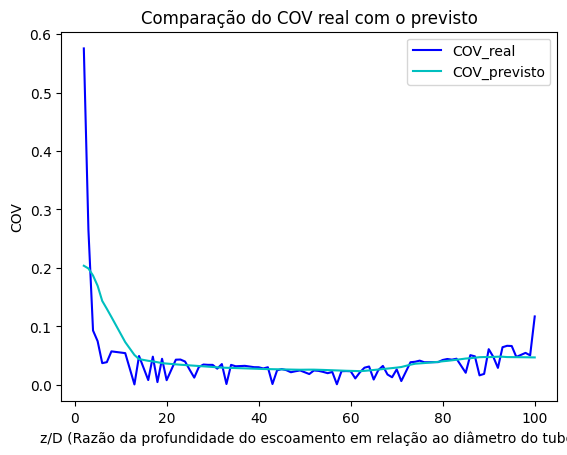

In [166]:
plt.plot(x_treino[4], y_treino, c='b')
plt.plot(x_treino[4], y_pred, c='c')
plt.title('Comparação do COV real com o previsto')
plt.ylabel('COV')
plt.xlabel('z/D (Razão da profundidade do escoamento em relação ao diâmetro do tubo)')
plt.legend(['COV_real', 'COV_previsto'])
plt.show()

In [167]:
y_treino = y_treino.values
y_treino = np.reshape(y_treino, (86,1))
y_pred = y_pred.values
y_pred = np.reshape(y_pred, (86, 1))

In [168]:
def erro_relativo(y_pred, y_true):
  return np.mean(np.abs((y_true - y_pred) / y_true))

erro_relativo(y_pred,y_treino)

2.3907596676083043